In [1]:
from run_sim import main, sim_from_state
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# set up dataframe for collecting event data
# time_network, adversary = main()
time_network, adversary = sim_from_state(check_time=7000)

Adversary: Start EXPLOIT_VULN at 7000.0s.
MTD: CompleteTopologyShuffle triggered 7000.0s
MTD: CompleteTopologyShuffle deployed in the network at 7000.0s.
Adversary: Processed EXPLOIT_VULN at 7020.1s.
Adversary: Host 95 has been compromised at 7020.1s!
Adversary: Start SCAN_NEIGHBOR at 7020.1s.
Adversary: Processed SCAN_NEIGHBOR at 7025.1s.
Adversary: Start ENUM_HOST at 7025.1s.
Adversary: Processed ENUM_HOST at 7027.1s.
Adversary: Start ENUM_HOST at 7027.1s.
Adversary: Processed ENUM_HOST at 7029.1s.
Adversary: Start ENUM_HOST at 7029.1s.
MTD: PortShuffle triggered 7030.6s
MTD: PortShuffle deployed in the network at 7030.6s.
Adversary: Processed ENUM_HOST at 7031.1s.
Adversary: Start ENUM_HOST at 7031.1s.
Adversary: Processed ENUM_HOST at 7033.1s.
Adversary: Start ENUM_HOST at 7033.1s.
Adversary: Processed ENUM_HOST at 7035.1s.
Adversary: Start ENUM_HOST at 7035.1s.
Adversary: Processed ENUM_HOST at 7037.1s.
Adversary: Start ENUM_HOST at 7037.1s.
Adversary: Processed ENUM_HOST at 7039.

In [3]:
print(time_network.get_mtd_stats().dict())
mtd_operation_record = pd.DataFrame(time_network.get_mtd_stats().get_record())

mtd_operation_record

{'Total suspended MTD': 128, 'Total triggered MTD': 375, 'Total executed MTD': 245, 'Total attack interrupted': 198, 'Switch MTD interval at': {}, 'Switch MTD strategy at': {}}


,name,start_time,finish_time,duration
0,CompleteTopologyShuffle,0.000000,70.140581,70.140581
1,UserShuffle,120.594314,130.780700,10.186387
2,CompleteTopologyShuffle,90.089021,160.480822,70.391801
3,HostTopologyShuffle,182.871469,223.161365,40.289896
4,UserShuffle,213.165516,223.559878,10.394363
...,...,...,...,...
240,CompleteTopologyShuffle,11089.997103,11160.060859,70.063756
241,HostTopologyShuffle,11181.378423,11221.863301,40.484878
242,HostTopologyShuffle,11241.800884,11282.586312,40.785428
243,UserShuffle,11332.491876,11342.828952,10.337075


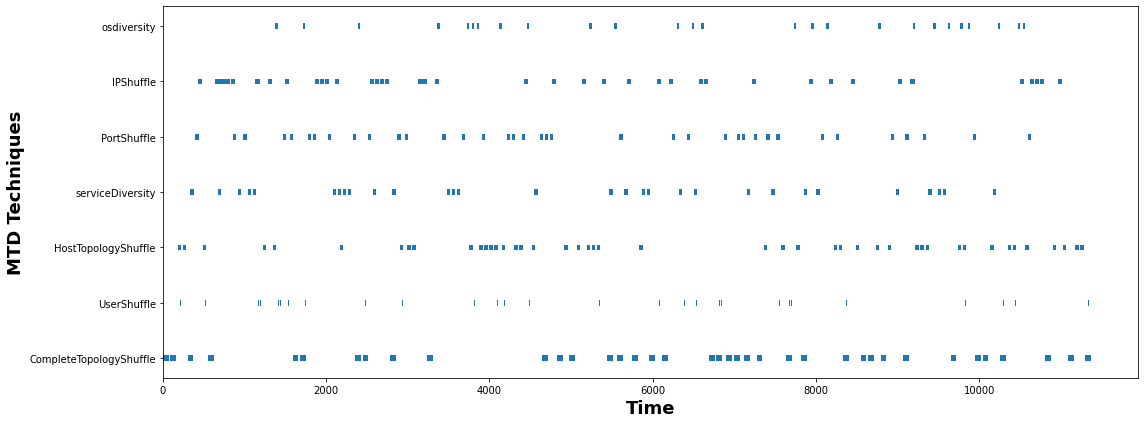

In [4]:
fig, ax = plt.subplots(1, figsize=(16, 6))
ax.barh(mtd_operation_record['name'], mtd_operation_record['duration'], left=mtd_operation_record['start_time'], height=0.1)

plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('MTD Techniques', weight='bold', fontsize=18)
fig.tight_layout()
plt.show()

In [5]:
attack_operation_record = pd.DataFrame(adversary.get_attack_stats().get_record())
attack_operation_record

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
0,SCAN_HOST,0.000000,5.000000,5.000000,-1,0,0,0,,[],,
1,ENUM_HOST,5.000000,7.000000,2.000000,-1,0,0,0,,[],,
2,SCAN_PORT,7.000000,17.000000,10.000000,0,1,0,0,,[],,
3,EXPLOIT_VULN,17.000000,39.596742,22.596742,0,1,0,0,0,"[Beilul, Valery, Clarice, Cherin, Prisca]",,
4,SCAN_NEIGHBOR,39.596742,44.596742,5.000000,0,1,13,1,,[],,
...,...,...,...,...,...,...,...,...,...,...,...,...
1719,SCAN_PORT,11382.553821,11392.553821,10.000000,19,2,952,199,,[],,
1720,EXPLOIT_VULN,11392.553821,11412.814478,20.260657,19,2,952,199,19,[],,
1721,SCAN_NEIGHBOR,11412.814478,11417.814478,5.000000,19,2,952,200,,[],,
1722,ENUM_HOST,11417.814478,11419.814478,2.000000,19,2,952,200,,[],,


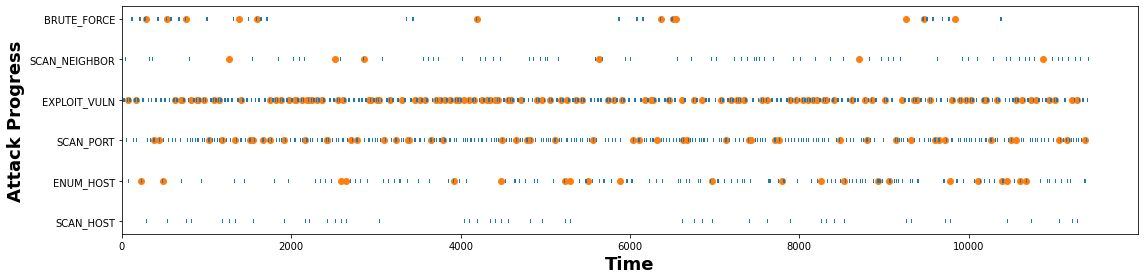

In [6]:
fig2, ax2 = plt.subplots(1, figsize=(16, 4))
ax2.barh(attack_operation_record['name'], attack_operation_record['duration'], left=attack_operation_record['start_time'], height=0.1)
interrupted_record = attack_operation_record[attack_operation_record['interrupted_by'] != '']
ax2.scatter( interrupted_record['finish_time'], interrupted_record['name'])
plt.xlabel('Time',  weight='bold', fontsize=18)
plt.ylabel('Attack Progress', weight='bold', fontsize=18)
fig2.tight_layout()
plt.show()

In [7]:
attack_operation_record[(attack_operation_record['name'] == 'SCAN_PORT') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
514,SCAN_PORT,4049.091799,4059.091799,10.0,33,2,615,47,33,"[Hermia, Ella]",,
525,SCAN_PORT,4111.319572,4121.319572,10.0,79,2,615,48,79,[Alexina],,
662,SCAN_PORT,5013.054507,5023.054507,10.0,63,1,666,61,63,[Wynny],,
743,SCAN_PORT,5493.695372,5503.695372,10.0,62,6,733,69,62,[Reta],,
878,SCAN_PORT,6368.494733,6378.494733,10.0,72,4,772,79,72,[Kissie],,
894,SCAN_PORT,6549.809053,6559.809053,10.0,71,3,772,81,71,[Georgine],,
904,SCAN_PORT,6580.809053,6590.809053,10.0,92,1,772,82,92,[Fleurette],,
925,SCAN_PORT,6688.387296,6698.387296,10.0,96,1,779,84,96,[],,
932,SCAN_PORT,6713.387296,6723.387296,10.0,104,2,779,85,104,[Rayna],,
951,SCAN_PORT,6815.727112,6825.727112,10.0,126,1,779,87,126,[],,


In [8]:
attack_operation_record[(attack_operation_record['name'] == 'EXPLOIT_VULN') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by
3,EXPLOIT_VULN,17.000000,39.596742,22.596742,0,1,0,0,0,"[Beilul, Valery, Clarice, Cherin, Prisca]",,
30,EXPLOIT_VULN,302.614120,323.205016,20.590896,23,3,59,1,23,"[Vicki, Nancey, Honoria, Cari, Jemimah]",,
34,EXPLOIT_VULN,340.205016,360.258620,20.053604,20,1,68,2,20,"[Gennie, Adriena, Melisandra, Robinett, Zorah]",,
46,EXPLOIT_VULN,449.364749,471.280899,21.916150,25,1,93,3,25,"[Rubina, Arleyne, Sharai, Vera]",,
81,EXPLOIT_VULN,775.544860,796.335095,20.790235,21,2,124,4,21,"[Moyra, Filippa, Melisa, Timothea]",,
...,...,...,...,...,...,...,...,...,...,...,...,...
1677,EXPLOIT_VULN,11126.311409,11146.587888,20.276478,13,1,934,193,13,[],,
1698,EXPLOIT_VULN,11240.863301,11261.071366,20.208065,16,2,942,196,16,[],,
1707,EXPLOIT_VULN,11301.586312,11321.632200,20.045889,17,2,948,197,17,[],,
1712,EXPLOIT_VULN,11340.632200,11361.177984,20.545784,18,1,949,198,18,[Jennie],,


In [9]:
attack_operation_record[(attack_operation_record['name'] == 'BRUTE_FORCE') & (attack_operation_record['compromise_host'] != '')]

,name,start_time,finish_time,duration,current_host,current_host_attempt,cumulative_attempts,cumulative_compromised_hosts,compromise_host,compromise_users,interrupted_in,interrupted_by


In [10]:
if not os.path.exists('data_analysis'):
    os.makedirs(os.path.dirname('data_analysis'))

attack_operation_record.to_csv('data_analysis/attack_operation_record.csv',index=False)
mtd_operation_record.to_csv('data_analysis/mtd_operation_record.csv', index=False)

In [11]:
attack_operation_record = pd.read_csv('data_analysis/attack_operation_record.csv')